In [1]:
# install.packages("ismev")
# install.packages("lubridate")

In [2]:
library(ismev)
library(lubridate)
library(extRemes)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: Lmoments

Loading required package: distillery


Attaching package: ‘extRemes’


The following objects are masked from ‘package:stats’:

    qqnorm, qqplot




Load in the De Bilt data set (https://climexp.knmi.nl/getdutchtx.cgi?WMO=260&STATION=De_Bilt).

In [3]:
debilt_data = read.table("txtx260.dat", colClasses = c('character', 'numeric'), col.names = c('date', 'maxtemp'))

Convert the first column to date format, and exclude all of year 2020 data.

In [4]:
debilt_data = transform(debilt_data, date=ymd(date))
debilt_data_without_2020 = debilt_data[debilt_data$date<ymd(20200101),]
debilt_data_without_2020

,date,maxtemp
,<date>,<dbl>
1,1901-01-02,-1.4
2,1901-01-03,-0.6
3,1901-01-04,-1.1
4,1901-01-05,-2.0
5,1901-01-06,-8.0
6,1901-01-07,-6.8
7,1901-01-08,-0.7
8,1901-01-09,4.4
9,1901-01-10,6.1


Get the yearly max temp:

In [5]:
debilt_yearly_max = aggregate(debilt_data_without_2020, FUN=max, by=list(year=year(debilt_data_without_2020$date)))
debilt_yearly_max

year,date,maxtemp
<dbl>,<date>,<dbl>
1901,1901-12-31,30.3
1902,1902-12-31,31.4
1903,1903-12-31,29.4
1904,1904-12-31,30.7
1905,1905-12-31,29.4
1906,1906-12-31,28.7
1907,1907-12-31,29.1
1908,1908-12-31,28.7
1909,1909-12-31,26.8


Plot the Jan-Dec Max temperature for the years 1901 to 2019

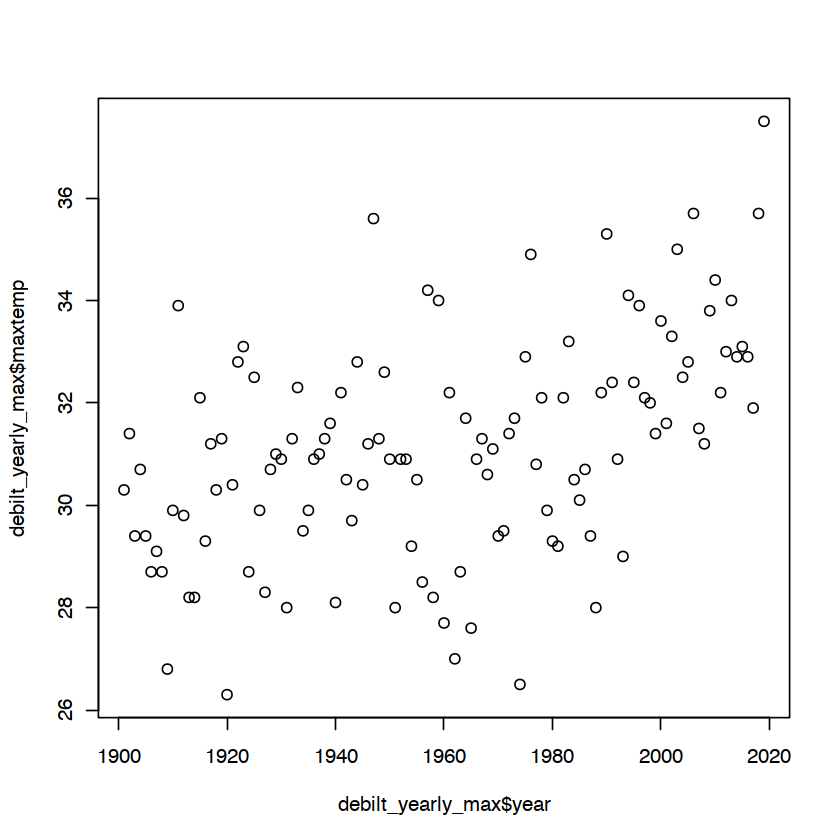

In [6]:
plot(debilt_yearly_max$year, debilt_yearly_max$maxtemp)

Now load in the global mean temperature with a 4-yr running mean filter (https://climexp.knmi.nl/getindices.cgi?WMO=NASAData/giss_al_gl_a_4yrlo&STATION=smoothed_GMST&TYPE=i).
Restrict to range 1901 - 2019

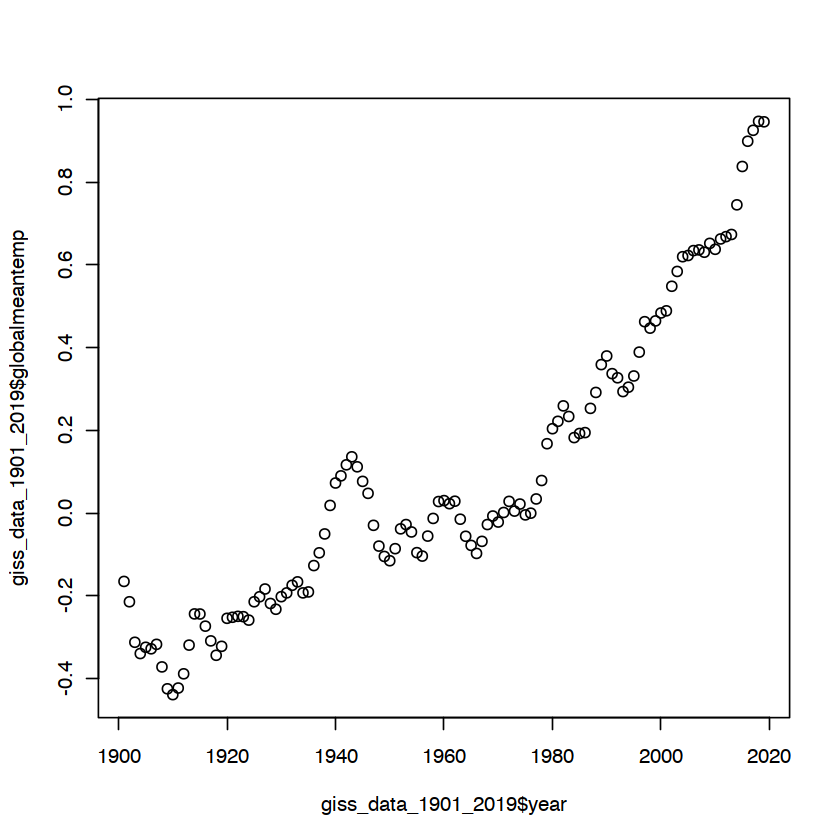

In [7]:
giss_data = read.table("igiss_al_gl_a_4yrlo.dat", col.names = c('year', 'globalmeantemp'))
giss_data_1901_2019 = giss_data[giss_data$year>1900 & giss_data$year<2020,]
plot(giss_data_1901_2019$year, giss_data_1901_2019$globalmeantemp)

Plot yearly max temp against global mean surface temp:

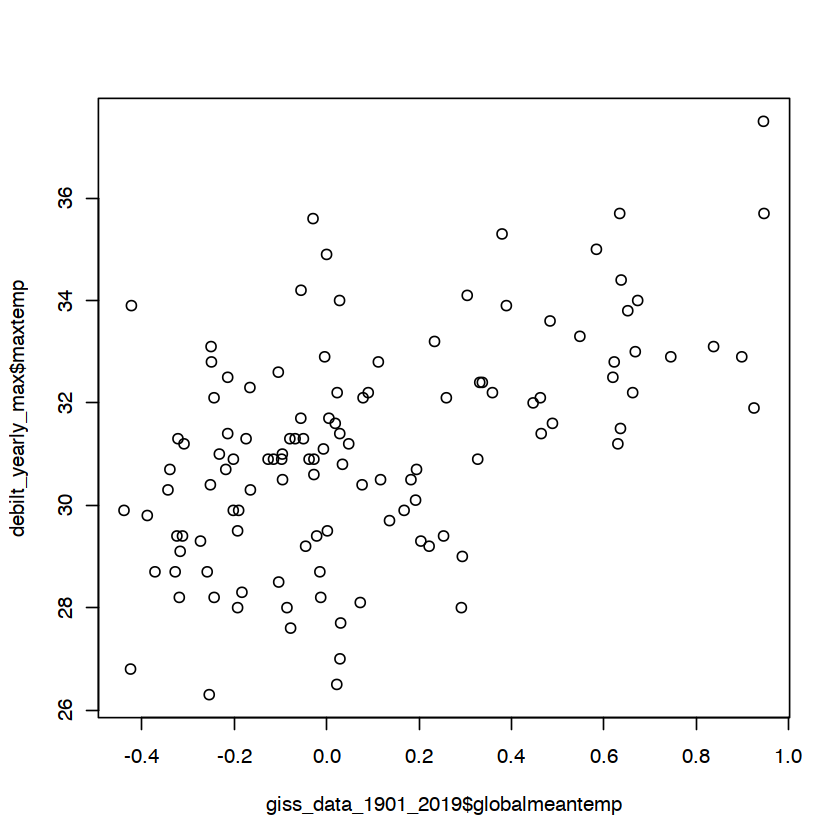

In [8]:
plot(giss_data_1901_2019$globalmeantemp, debilt_yearly_max$maxtemp)

Perform GEV fit for non-stationary distribution (using global mean surface temp as the covariate).
Note that the fitting function only works if ydat is given a matrix even though xdat works fine with the data frame.

In [9]:
covariate_matrix = data.matrix(giss_data_1901_2019$globalmeantemp)
fit = gev.fit(debilt_yearly_max$maxtemp, ydat = covariate_matrix, mul = 1)

$model
$model[[1]]
[1] 1

$model[[2]]
NULL

$model[[3]]
NULL


$link
[1] "c(identity, identity, identity)"

$conv
[1] 0

$nllh
[1] 239.7187

$mle
[1] 30.1706442  3.3091322  1.7892485 -0.2455664

$se
[1] 0.1859067 0.4920010 0.1238916 0.0523815



Get the location, scale and shape for 2019:

In [10]:
last_entry = tail(fit$vals, n=1)
location_2019 = last_entry[1]
scale_2019 = last_entry[2]
shape_2019 = last_entry[3]

# Also get the shift factor, a
a_2019 = fit$mle[2]

Get the location and scale for 1901:

In [11]:
location_1901 = fit$vals[1,1]
scale_1901 = fit$vals[1,2]
shape_1901 = fit$vals[1,3]

In [12]:
sprintf("mu (1901): %f", location_1901)
sprintf("sigma (1901): %f", scale_1901)
sprintf("mu (2019): %f", location_2019)
sprintf("sigma (2019): %f", scale_2019)
sprintf("eps: %f", shape_2019)
sprintf("a: %f", a_2019)

[1] "mu (1901): 29.623948"

[1] "sigma (1901): 1.789249"

[1] "mu (2019): 33.300762"

[1] "sigma (2019): 1.789249"

[1] "eps: -0.245566"

[1] "a: 3.309132"

Compare with the values in Geert-Jan's reference table: ![caption](expected_table_output.png)


 Get the return levels for this fit (using the extRemes package)

In [13]:
start_6year = rlevd(6, loc = location_1901, scale = scale_1901, shape = shape_1901, threshold = 0, type = "GEV", npy = 365.25)
end_6year = rlevd(6, loc = location_2019, scale = scale_2019, shape = shape_2019, threshold = 0, type = "GEV", npy = 365.25)
start_40year = rlevd(40, loc = location_1901, scale = scale_1901, shape = shape_1901, threshold = 0, type = "GEV", npy = 365.25)
end_40year = rlevd(40, loc = location_2019, scale = scale_2019, shape = shape_2019, threshold = 0, type = "GEV", npy = 365.25)

global_temp_1901 = giss_data_1901_2019$globalmeantemp[1]
global_temp_2019 = tail(giss_data_1901_2019$globalmeantemp, n=1)

return_vals = data.frame(global_temp=c(global_temp_1901, global_temp_2019), rv6=c(start_6year, end_6year), rv40=c(start_40year, end_40year))
return_vals

global_temp,rv6,rv40
<dbl>,<dbl>,<dbl>
-0.1652083,32.11295,33.95598
0.9459028,35.78977,37.63279


Now, attempt to recreate the temperature vs global mean surface temp plot:
![caption](htxtx260_21028_obsplot.png)


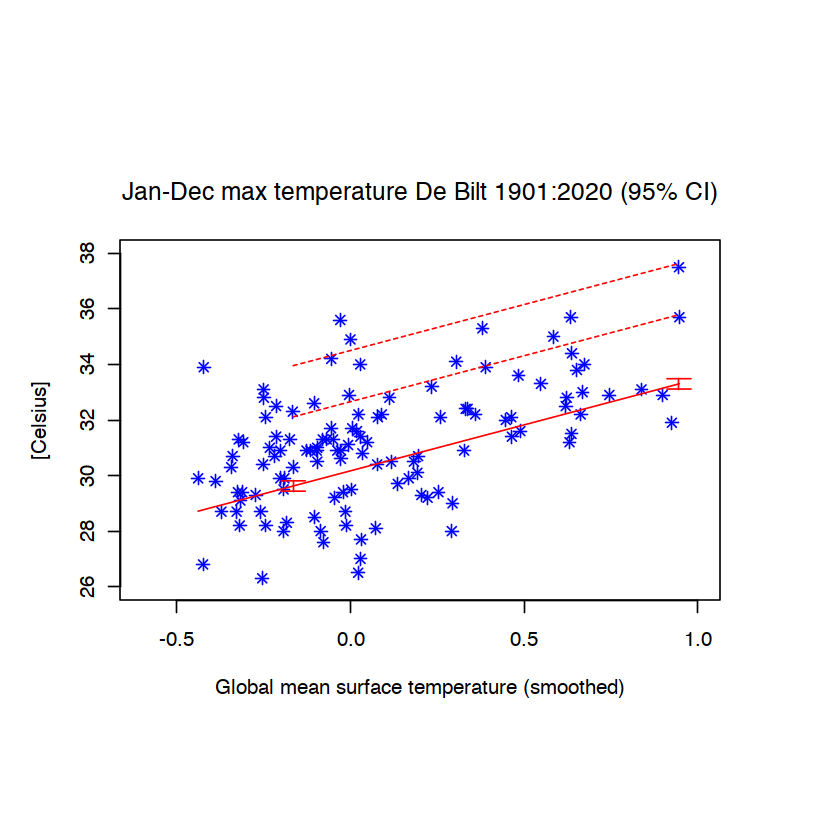

In [14]:
par(pin = c(5,3))
plot(giss_data_1901_2019$globalmeantemp, debilt_yearly_max$maxtemp, col="blue", xlim=c(-0.6,1), ylim=c(26,38), xlab='Global mean surface temperature (smoothed)', ylab='[Celsius]', pch=8, main='Jan-Dec max temperature De Bilt 1901:2020 (95% CI)')
lines(giss_data_1901_2019$globalmeantemp, fit$vals[,1], col="red",lty=1)
lines(return_vals$global_temp, return_vals$rv6, col="red",lty=2)
lines(return_vals$global_temp, return_vals$rv40, col="red",lty=2)

# Add error bar - 1901
x=global_temp_1901
y=location_1901
y.sd=fit$se[1]
arrows(x0=x, y0=y-y.sd, x1=x, y1=y+y.sd, code=3, angle=90, length=0.1, col="red")

# Add error bar - 2019
x=global_temp_2019
y=location_2019
y.sd=fit$se[1]
arrows(x0=x, y0=y-y.sd, x1=x, y1=y+y.sd, code=3, angle=90, length=0.1, col="red")

The scatter and the return level lines look approximately right. However, I do not understand what the error bars for the 1901 and 2019 years are supposed to represent. The fit from ismev only seems to return one set of standard errors (look at fit$se), even in the non-stationary case.

Now let's try to replicate the return period plot:
![caption](htxtx260_21028.png)

Get return levels for the GEV fits for 1901 and 2019. Note that rlevd (from the extRemes package) does not allow a period <= 1. I've tried the range r = 1.5 to 10000

In [15]:
rvals = c()
rlevels_1901 = c()
rlevels_2019 = c()
for (r in seq(1.5, 10000, by=1)) {
    rl1901 = rlevd(r, loc = location_1901, scale = scale_1901, shape = shape_2019, type = "GEV", npy = 1)
    rl2019 = rlevd(r, loc = location_2019, scale = scale_2019, shape = shape_2019, type = "GEV", npy = 1)
    
    rlevels_1901 = c(rlevels_1901, rl1901)
    rlevels_2019 = c(rlevels_2019, rl2019)
    rvals = c(rvals, r)
}

rlevels = data.frame(rvals=rvals, rlevels_1901=rlevels_1901, rlevels_2019=rlevels_2019)

ERROR: Error in rlevd(r, loc = location_1901, scale = scale_1901, shape = shape, : object 'shape' not found


In [16]:
par(pin = c(5,5))
plot(rlevels$rvals, rlevels$rlevels_2019, log="x", ylim=c(24,42), xlim=c(1.4,10000), col="red", type="l", main='Jan-Dec max temperature De Bilt 1901:2020 (95% CI)', ylab='[Celsius]', xlab='return period [yr]')
lines(rlevels$rvals, rlevels$rlevels_1901, lty=1, col="blue")

observed_max_2019 = tail(debilt_yearly_max, n=1)$maxtemp
lines(c(2,10000), c(observed_max_2019,observed_max_2019), lty=1, col="pink")

ERROR: Error in plot(rlevels$rvals, rlevels$rlevels_2019, log = "x", ylim = c(24, : object 'rlevels' not found


Notes/questions:
* What are these red and blue data points in the reference plot - how have they been matched to a return value?
* The return values function in extRemes (rlevd) cannot do periods <= 1 year, but the reference plot looks like there is data below 1. Is this just an illusion?
* The reference plot has an extra pair of lines, above and below. I assume this represents the 95% confidence levels, but I don't know how to get this from rlevd().